Waste Management Using CNN

In [1]:
#requrirements.txt
#numpy
#pandas
#matplotlib
#opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path="C:\\CNN Project\\WasteClassification\\DATASET\\TRAIN"
test_path="C:\\CNN Project\\WasteClassification\\DATASET\\TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
#visulaization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:08<00:00, 1118.29it/s]


In [6]:
data.shape

(22564, 2)

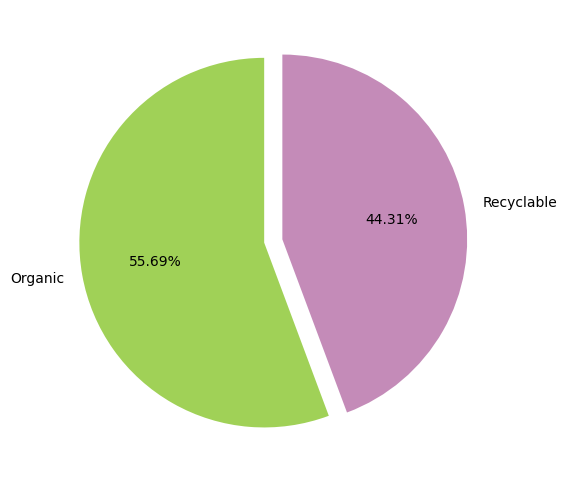

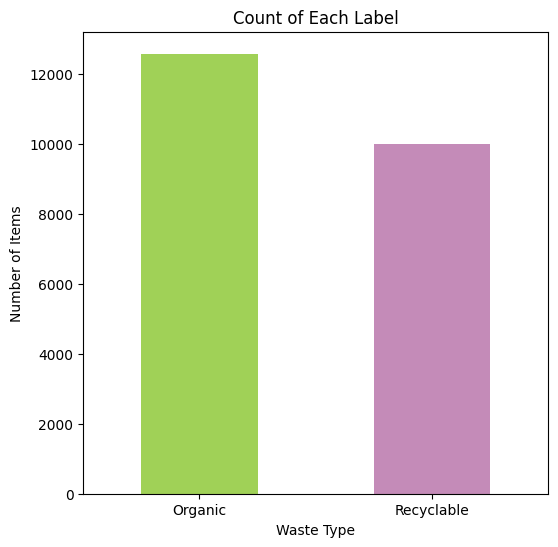

In [7]:
colors = ["#a0d157", "#c48bb8"]
plt.figure(figsize=(10, 6))
plt.pie(data.label.value_counts(), labels=["Organic", "Recyclable"], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])  # explode is optional
plt.show()

# Adding a bar plot to visualize the count of each label
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Label')
plt.xlabel('Waste Type')
plt.ylabel('Number of Items')
plt.xticks(ticks=[0, 1], labels=["Organic", "Recyclable"], rotation=0)
plt.show()

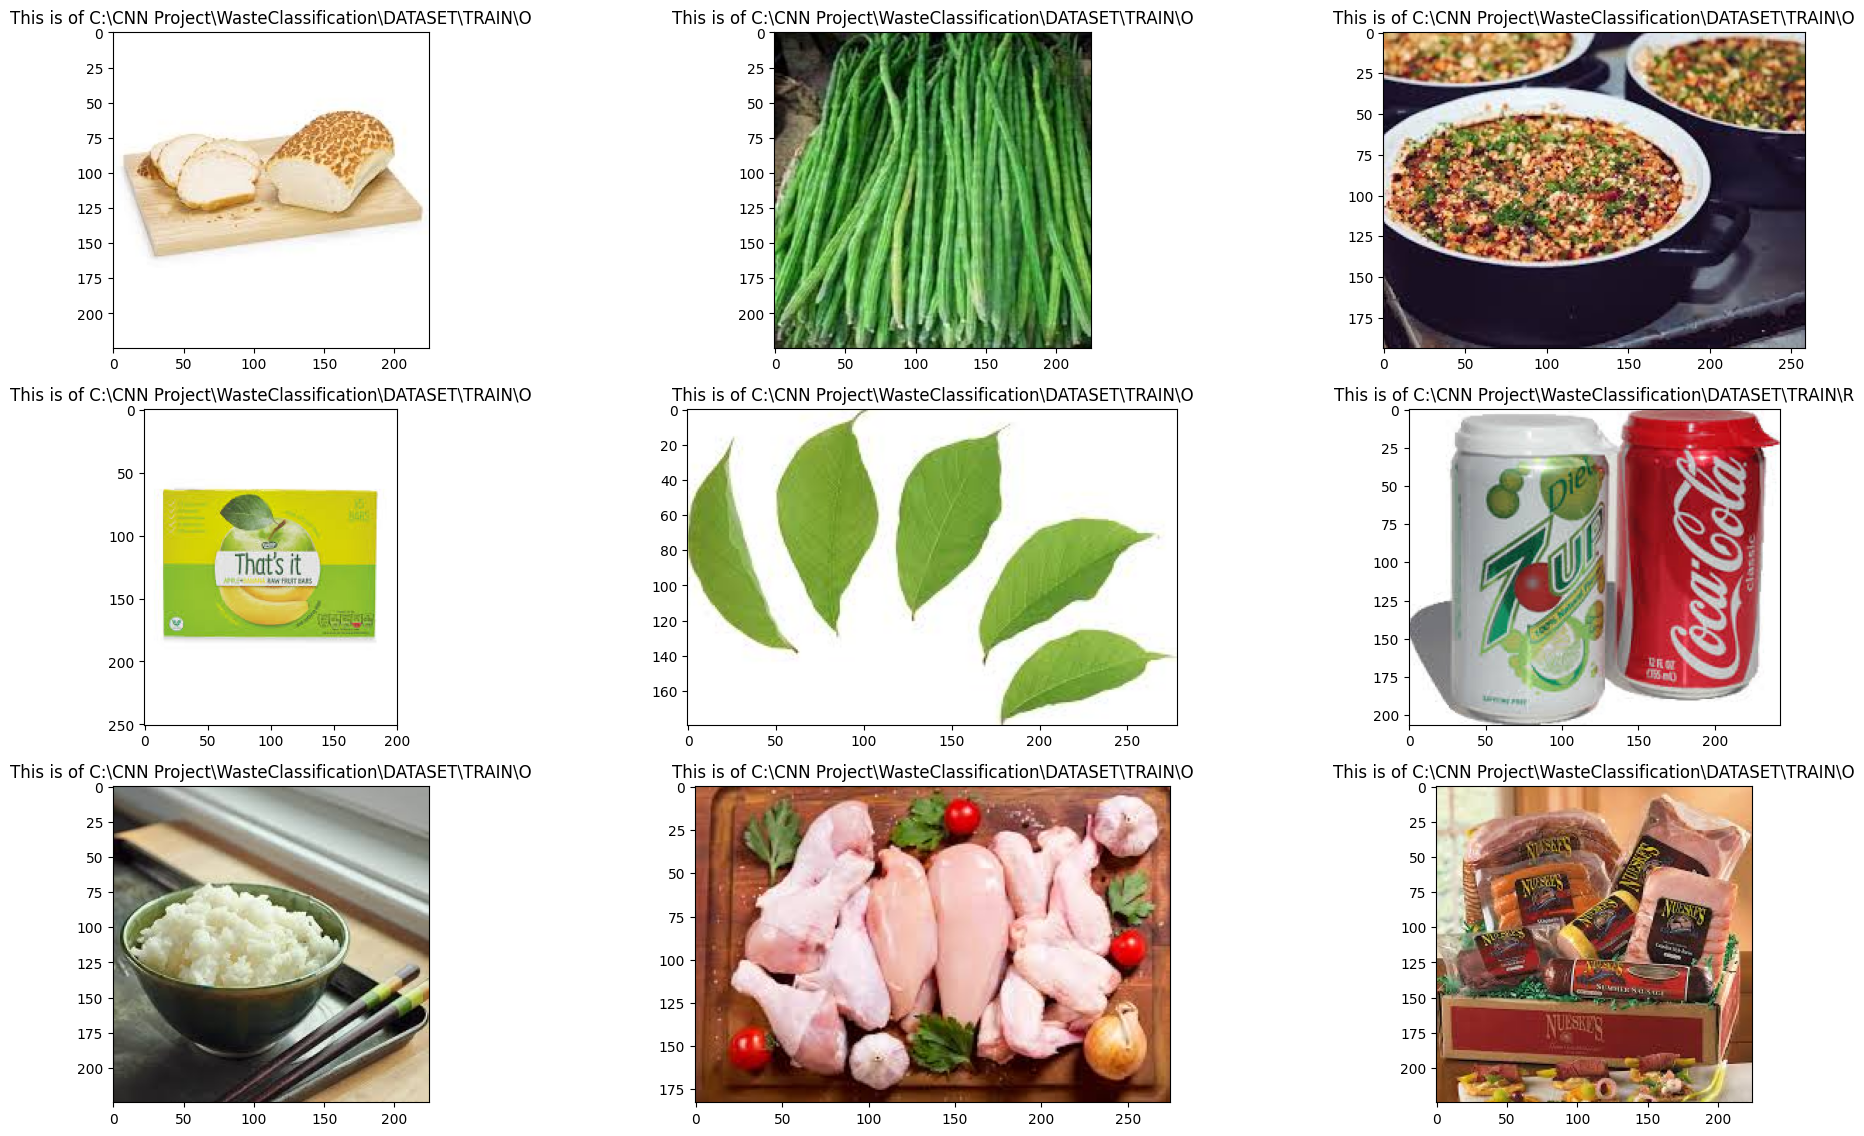

In [8]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 256

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_datagen= train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode='categorical')
test_datagen= test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist=model.fit(train_datagen,epochs=10,validation_data=test_datagen)  

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 520s 6s/step - accuracy: 0.6782 - loss: 0.7161 - val_accuracy: 0.8707 - val_loss: 0.3539
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 468s 5s/step - accuracy: 0.8209 - loss: 0.4278 - val_accuracy: 0.8882 - val_loss: 0.3173
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.8372 - loss: 0.3952 - val_accuracy: 0.8890 - val_loss: 0.2856
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 532s 6s/step - accuracy: 0.8522 - loss: 0.3615 - val_accuracy: 0.8945 - val_loss: 0.2827
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 552s 6s/step - accuracy: 0.8599 - loss: 0.3470 - val_accuracy: 0.8910 - val_loss: 0.2967
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 450s 5s/step - accuracy: 0.8703 - loss: 0.3217 - val_accuracy: 0.8794 - val_loss: 0.3172
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 494s 6s/step - accuracy: 0.8831 - loss: 0.2950 - val_accuracy: 0.8874 - val_loss: 0.2865
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 531s 6s/step - accuracy: 0.8916 - loss: 0.2689 - val_accuracy: 0.9089 - v